In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Load Dataset & EDA
file_path = r"C:\Users\admin\Downloads\Excelr Assignment\Random Forest\Random Forest\glass.xlsx"
df = pd.read_excel(file_path, sheet_name="glass")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
# To check first 5 rows
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# To check how many rows and columns
df.shape

(214, 10)

In [5]:
# To check the all information about thae dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
# To check the missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
# To check Summary Statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Figure size 1200x800 with 0 Axes>

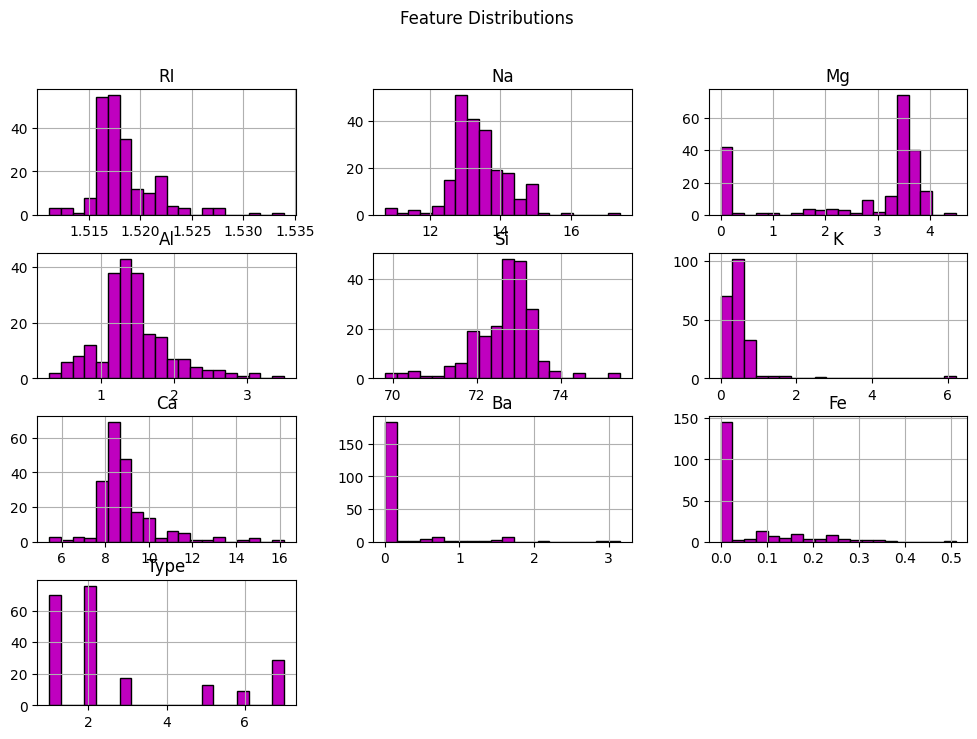

In [8]:
# 2. Data Visualization
# Histograms
plt.figure(figsize=(12,8))
df.hist(bins=20, figsize=(12,8), edgecolor='black',color='m')
plt.suptitle("Feature Distributions")
plt.show()

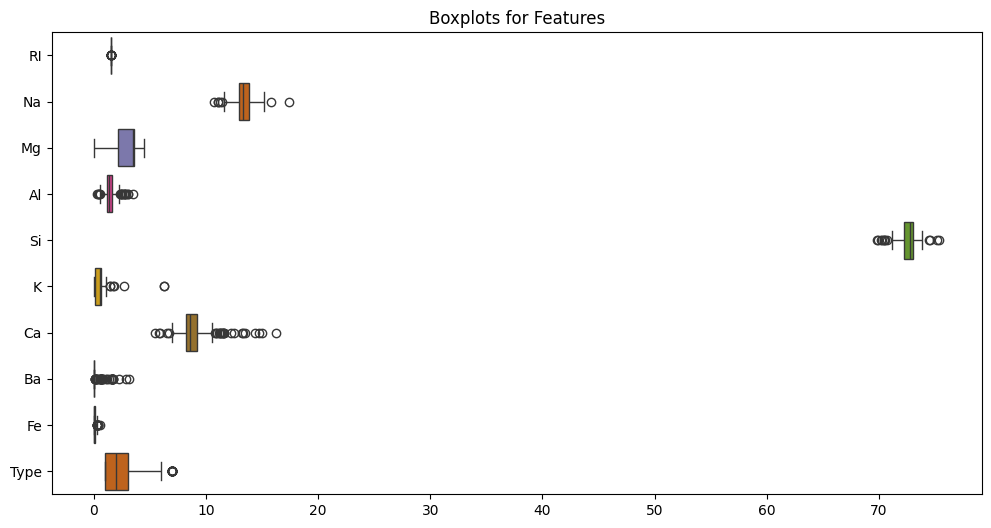

In [9]:
# Boxplots to detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h",palette='Dark2')
plt.title("Boxplots for Features")
plt.show()

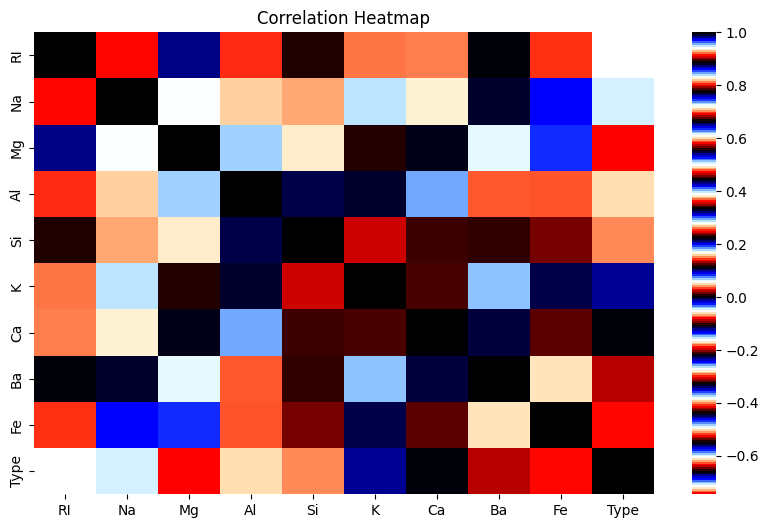

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="flag", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# 3. Data Preprocessing
# Separate features & target
X = df.drop(columns=["Type"])   # assuming target column is 'Type'
y = df["Type"]

In [12]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Handle class imbalance using SMOTE
print("Before SMOTE:", y.value_counts())
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("After SMOTE:", y_resampled.value_counts())

Before SMOTE: Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64
After SMOTE: Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


In [14]:
# 4. Random Forest Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [16]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [17]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Results:
Accuracy: 0.9130434782608695
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



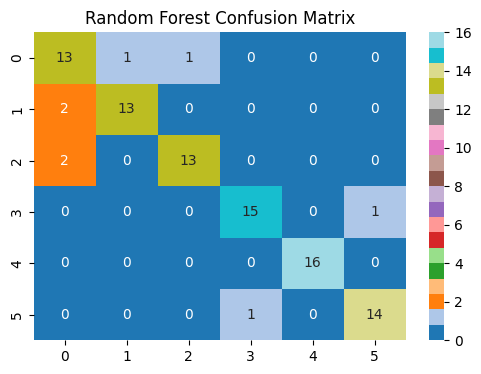

In [18]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="tab20")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [19]:
# 5. Bagging and Boosting
# Bagging with Decision Tree
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)
print("\nBagging Accuracy:", accuracy_score(y_test, bag_pred))


Bagging Accuracy: 0.8260869565217391


In [20]:
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
ada_pred = adaboost.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))

AdaBoost Accuracy: 0.3804347826086957


In [21]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Accuracy: 0.9130434782608695


In [22]:
# 6. Explanations
print("""
Bagging vs Boosting:
- Bagging (Bootstrap Aggregating): trains multiple independent models on random subsets of data and averages results → reduces variance, avoids overfitting.
- Boosting: trains models sequentially, where each new model focuses on errors of the previous one → reduces bias, builds strong learners.

Handling Imbalance:
- Here we used SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples for minority classes.
- Other methods: Random Oversampling, Undersampling, Ensemble methods with class weights.
""")


Bagging vs Boosting:
- Bagging (Bootstrap Aggregating): trains multiple independent models on random subsets of data and averages results → reduces variance, avoids overfitting.
- Boosting: trains models sequentially, where each new model focuses on errors of the previous one → reduces bias, builds strong learners.

Handling Imbalance:
- Here we used SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples for minority classes.
- Other methods: Random Oversampling, Undersampling, Ensemble methods with class weights.

